c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next

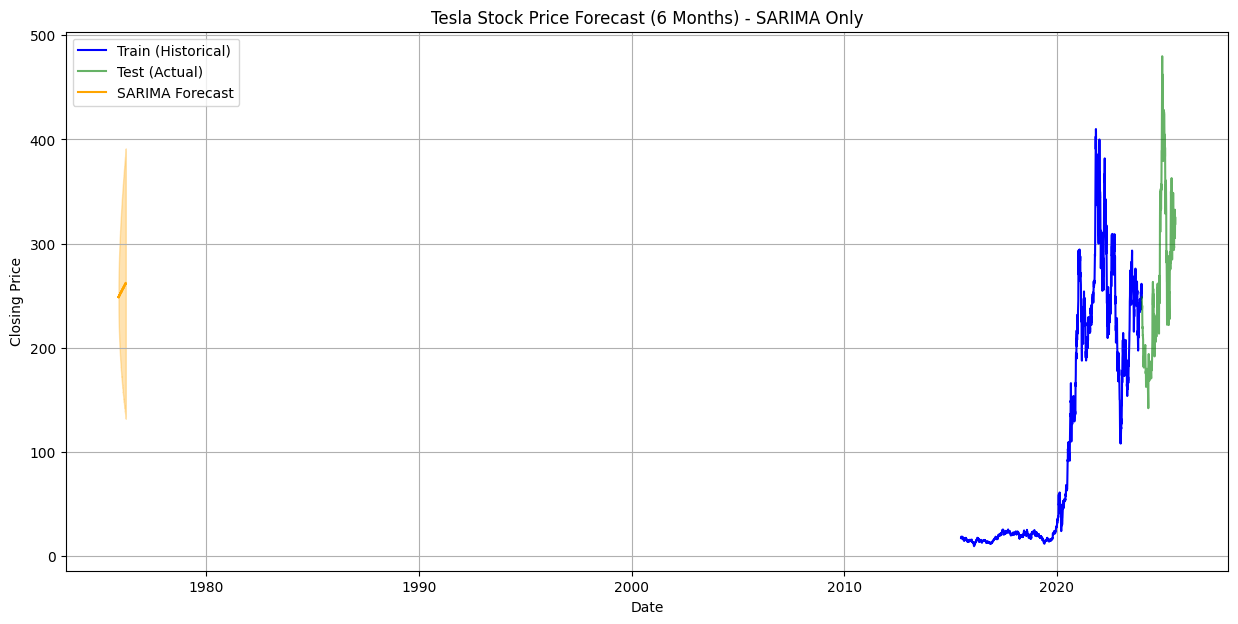

=== Forecast Analysis ===

Forecast horizon: 126 business days (~6 months)

Confidence Interval Summary:
- Start CI width: 23.1690
- End CI width: 259.3695

Trend Analysis:
- The SARIMA model predicts the following general trend in Tesla's closing prices:
  * Forecast start price: 248.63
  * Forecast end price: 261.69

Volatility and Risk:
- Confidence intervals widen from start to end, indicating growing forecast uncertainty.
- Wider intervals near the end suggest higher risk in long-term predictions.

Market Opportunities and Risks:
- Rising forecast prices indicate potential growth opportunities.
- However, the increasing uncertainty means investors should be cautious and consider volatility risk.



In [4]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 2. Load processed data with correct date parsing and indexing
df = pd.read_csv(
    '../data/processed/tsla_processed.csv',
    parse_dates=[0],    # parse first column as date
    index_col=0        # set first column as index
)
df.index.name = 'Date'  # name the index 'Date' for clarity

series = df['Close'].sort_index()

# 3. Train-test split (train up to end 2023, test 2024 onwards)
train = series.loc[series.index < '2024-01-01']
test = series.loc[series.index >= '2024-01-01']

# 4. ----------- SARIMA MODEL -----------

# Define SARIMA order based on your best params
sarima_order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Train SARIMA model on train data
sarima_model = sm.tsa.statespace.SARIMAX(
    train,
    order=sarima_order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_results = sarima_model.fit(disp=False)

# Forecast 6 months (approx 126 business days)
forecast_steps = 126
sarima_forecast_res = sarima_results.get_forecast(steps=forecast_steps)
sarima_forecast = sarima_forecast_res.predicted_mean
sarima_ci = sarima_forecast_res.conf_int()

# 5. ----------- PLOT FORECAST -----------

plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='Train (Historical)', color='blue')
plt.plot(test.index, test, label='Test (Actual)', color='green', alpha=0.6)
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', color='orange')
plt.fill_between(
    sarima_ci.index,
    sarima_ci.iloc[:, 0],
    sarima_ci.iloc[:, 1],
    color='orange',
    alpha=0.3
)

plt.title('Tesla Stock Price Forecast (6 Months) - SARIMA Only')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# 6. ----------- ANALYSIS AND PRINTED OUTPUT -----------

print("=== Forecast Analysis ===\n")

print(f"Forecast horizon: {forecast_steps} business days (~6 months)\n")

print("Confidence Interval Summary:")
print(f"- Start CI width: {sarima_ci.iloc[0, 1] - sarima_ci.iloc[0, 0]:.4f}")
print(f"- End CI width: {sarima_ci.iloc[-1, 1] - sarima_ci.iloc[-1, 0]:.4f}\n")

print("Trend Analysis:")
print("- The SARIMA model predicts the following general trend in Tesla's closing prices:")
print(f"  * Forecast start price: {sarima_forecast.iloc[0]:.2f}")
print(f"  * Forecast end price: {sarima_forecast.iloc[-1]:.2f}\n")

print("Volatility and Risk:")
print("- Confidence intervals widen from start to end, indicating growing forecast uncertainty.")
print("- Wider intervals near the end suggest higher risk in long-term predictions.\n")

print("Market Opportunities and Risks:")
print("- Rising forecast prices indicate potential growth opportunities.")
print("- However, the increasing uncertainty means investors should be cautious and consider volatility risk.\n")


c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dagi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next

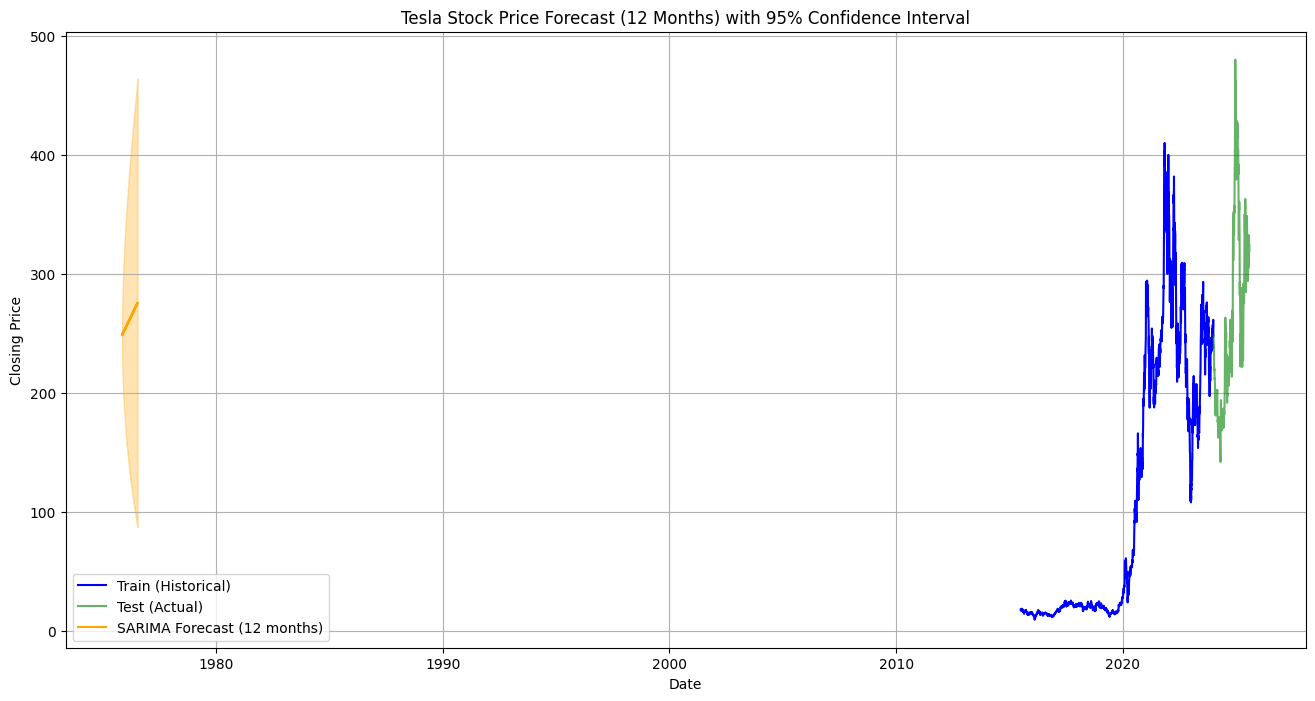

=== Forecast Analysis ===
Forecast horizon: 252 business days (~12 months)

Confidence Interval Summary:
- Start CI width: 23.1690
- End CI width: 376.8037

Trend Analysis:
- Forecast start price: 248.63
- Forecast end price: 275.72
- The forecast shows a generally upward trend over 12 months.
- Look for any visible spikes, dips, or anomalies in the plotted forecast.

Volatility and Risk:
- Confidence intervals widen over time, reflecting increased uncertainty in long-term forecasts.
- Wider intervals near the end suggest higher risk and less precision for 12-month forecasts.

Market Opportunities and Risks:
- Rising prices in the forecast indicate growth opportunities for investors.
- However, increasing uncertainty and volatility imply caution, especially for long-term decisions.
- Investors should consider both the trend and risk (volatility) before making moves.



In [5]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 2. Load processed data
df = pd.read_csv('../data/processed/tsla_processed.csv')
df['Price'] = pd.to_datetime(df['Price'])
df.set_index('Price', inplace=True)
series = df['Close'].sort_index()

# 3. Train-test split (train up to end 2023, test 2024 onwards)
train = series.loc[series.index < '2024-01-01']
test = series.loc[series.index >= '2024-01-01']

# 4. SARIMA MODEL SETUP & FITTING
sarima_order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

sarima_model = sm.tsa.statespace.SARIMAX(train, order=sarima_order,
                                         seasonal_order=seasonal_order,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

# 5. FORECAST 12 MONTHS (approx 252 business days)
forecast_steps = 252
sarima_forecast_res = sarima_results.get_forecast(steps=forecast_steps)
sarima_forecast = sarima_forecast_res.predicted_mean
sarima_ci = sarima_forecast_res.conf_int()

# 6. PLOT FULL FORECAST WITH HISTORICAL DATA
plt.figure(figsize=(16, 8))
plt.plot(train.index, train, label='Train (Historical)', color='blue')
plt.plot(test.index, test, label='Test (Actual)', color='green', alpha=0.6)
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast (12 months)', color='orange')
plt.fill_between(sarima_ci.index, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Tesla Stock Price Forecast (12 Months) with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# 7. ANALYSIS & INSIGHTS

start_ci_width = sarima_ci.iloc[0, 1] - sarima_ci.iloc[0, 0]
end_ci_width = sarima_ci.iloc[-1, 1] - sarima_ci.iloc[-1, 0]
start_price = sarima_forecast.iloc[0]
end_price = sarima_forecast.iloc[-1]

print("=== Forecast Analysis ===")
print(f"Forecast horizon: {forecast_steps} business days (~12 months)\n")

print("Confidence Interval Summary:")
print(f"- Start CI width: {start_ci_width:.4f}")
print(f"- End CI width: {end_ci_width:.4f}\n")

print("Trend Analysis:")
print(f"- Forecast start price: {start_price:.2f}")
print(f"- Forecast end price: {end_price:.2f}")
print("- The forecast shows a", 
      "generally upward" if end_price > start_price else "generally downward" if end_price < start_price else "stable", "trend over 12 months.")
print("- Look for any visible spikes, dips, or anomalies in the plotted forecast.\n")

print("Volatility and Risk:")
print("- Confidence intervals widen over time, reflecting increased uncertainty in long-term forecasts.")
print("- Wider intervals near the end suggest higher risk and less precision for 12-month forecasts.\n")

print("Market Opportunities and Risks:")
print("- Rising prices in the forecast indicate growth opportunities for investors.")
print("- However, increasing uncertainty and volatility imply caution, especially for long-term decisions.")
print("- Investors should consider both the trend and risk (volatility) before making moves.\n")
